In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/train.csv"

total_rows = 120000

number_of_rows = 10000

random_state = 42

np.random.seed(random_state)
skip = sorted(np.random.choice(np.arange(1, total_rows+1), (total_rows - number_of_rows), replace=False))

dataset = pd.read_csv(file_path, skiprows=skip)
print(dataset.head())


   Class Index                                       Title  \
0            3                       Hip Hop's Online Shop   
1            3           Oldsmobile: The final parking lot   
2            3                          IT alligator tales   
3            3           Fark Sells Out. France Surrenders   
4            4  Rescuers Free Beached Whale in Brazil (AP)   

                                         Description  
0  Celebrity fashion is booming. These webpreneur...  
1  Why General Motors dropped the Oldsmobile. The...  
2  I grew up in New York, where giant alligators ...  
3  Blogs are the hottest thing on the Net, but ar...  
4  AP - Rescuers succeeded in freeing a minke wha...  


In [ ]:
dataset.shape

(10000, 3)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  10000 non-null  int64 
 1   Title        10000 non-null  object
 2   Description  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
print(dataset.columns)

Index(['Class Index', 'Title', 'Description'], dtype='object')


In [ ]:
dataset['Title'].value_counts()

,count
Title,
#NAME?,4
Enter your e-mail:,4
American Express Profit Rises 14 Percent,3
"Arafat Dead, Say Palestinian Sources Amid Confusion",2
"SBC, BellSouth let their fingers do the walking",2
...,...
Oil prices rise 7 for the week,1
Commerce One Headed For Liquidation (TechWeb),1
Rutan ready to realise vision,1


In [ ]:
target_category = dataset['Class Index'].unique()
print(target_category)

[3 4 2 1]


In [ ]:
dataset['CategoryId'] = dataset['Class Index'].factorize()[0]
dataset.head()

,Class Index,Title,Description,CategoryId
0,3,Hip Hop's Online Shop,Celebrity fashion is booming. These webpreneur...,0
1,3,Oldsmobile: The final parking lot,Why General Motors dropped the Oldsmobile. The...,0
2,3,IT alligator tales,"I grew up in New York, where giant alligators ...",0
3,3,Fark Sells Out. France Surrenders,"Blogs are the hottest thing on the Net, but ar...",0
4,4,Rescuers Free Beached Whale in Brazil (AP),AP - Rescuers succeeded in freeing a minke wha...,1


In [ ]:
category = dataset[['Class Index', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Class Index,CategoryId
0,3,0
4,4,1
43,2,2
45,1,3


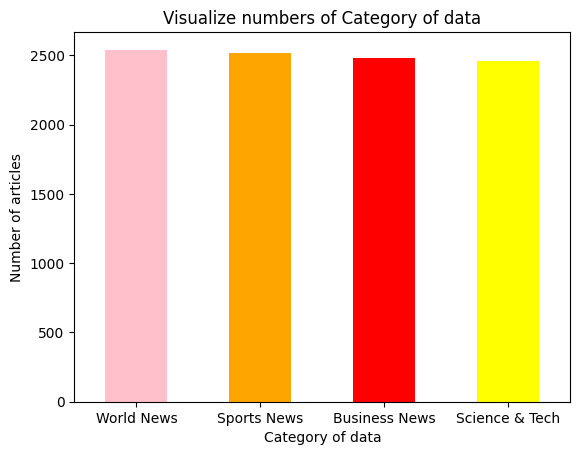

In [ ]:
category_counts = dataset['Class Index'].value_counts()
category_counts.plot(kind="bar", color=["pink", "orange", "red", "yellow"])
plt.xlabel("Category of data")
plt.ylabel("Number of articles")
plt.title("Visualize numbers of Category of data")
plt.xticks(ticks=range(len(category_counts)), labels=['World News', 'Sports News', 'Business News', 'Science & Tech'], rotation=0)
plt.show()


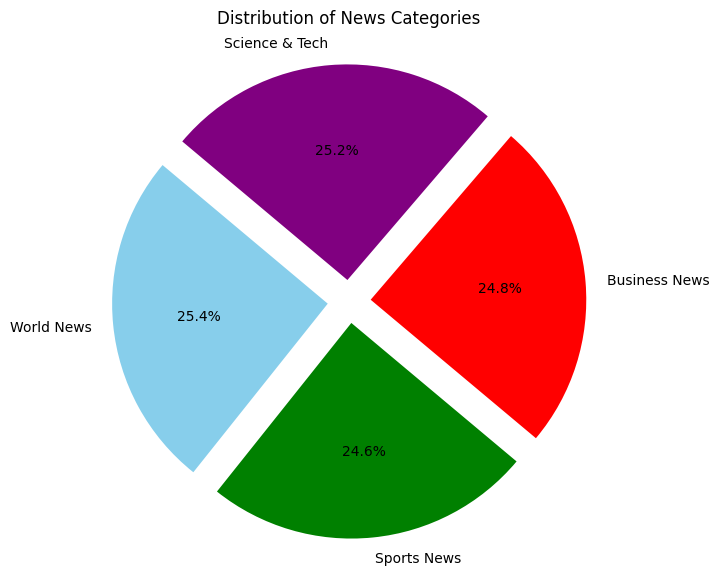

In [ ]:
import matplotlib.pyplot as plt

counts = dataset['CategoryId'].value_counts().sort_index()

categories = ['World News', 'Sports News', 'Business News', 'Science & Tech']

colors = ['skyblue', 'green', 'red', 'purple']

explode = [0.1] * len(categories)


plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
plt.title('Distribution of News Categories')
plt.show()


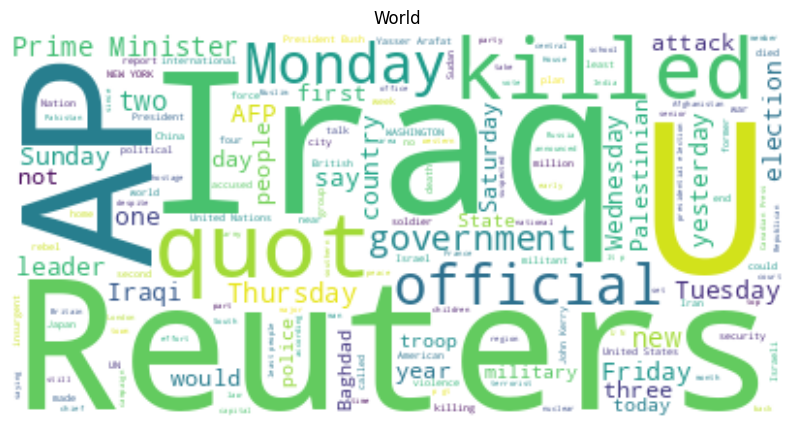

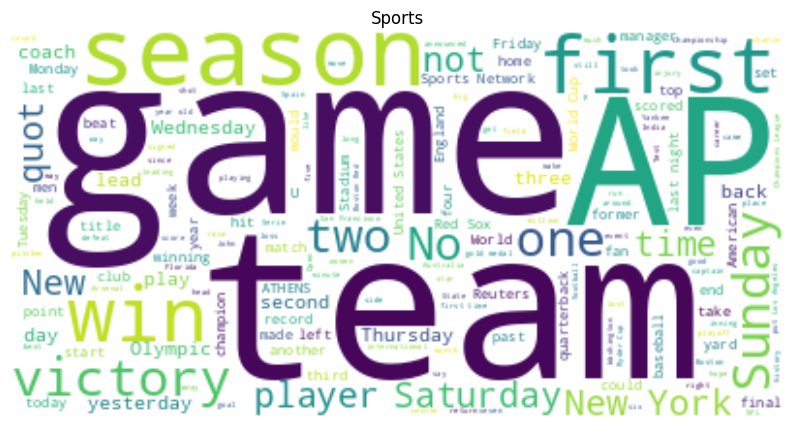

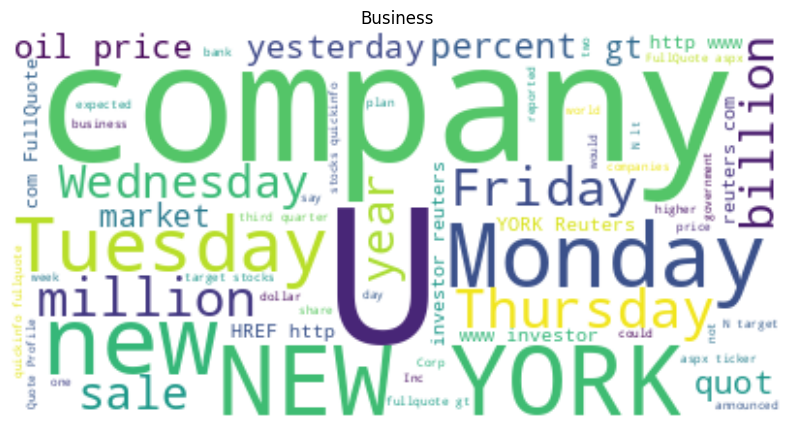

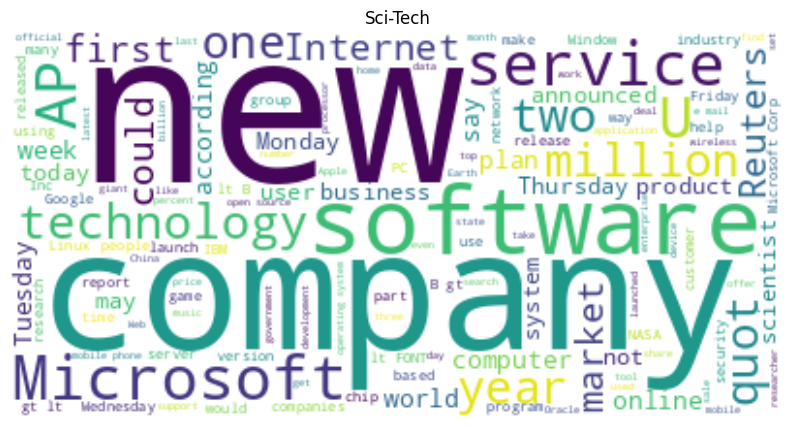

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


STOP_WORDS = stopwords.words('english')
stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")

def generate_wordcloud(text, title):
    plt.figure(figsize=(10, 15))
    wc = WordCloud(max_words=500, background_color='white', stopwords=stopwords)
    wc.generate(" ".join(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

for index, category in enumerate(['World', 'Sports', 'Business', 'Sci-Tech'], start=1):
    category_text = dataset['Description'][dataset['Class Index'] == index]
    generate_wordcloud(category_text, category)


In [ ]:
def remove_tags(text):
    remove = re.compile(r'<.*?>')
    return re.sub(remove, '', text)

dataset['Description'] = dataset['Description'].apply(remove_tags)

In [ ]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Description'] = dataset['Description'].apply(special_char)

In [ ]:
def convert_lower(text):
   return text.lower()
dataset['Description'] = dataset['Description'].apply(convert_lower)
dataset['Description'][1]

'why general motors dropped the oldsmobile  the four brand  paradoxes gm had to face   the name  the product  image re positioning  and the consumer   all added up to a brand that had little hope of rebranding '

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return [x for x in words if x.lower() not in stop_words]

dataset['Description'] = dataset['Description'].apply(remove_stopwords)

dataset['Description'][1]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['general',
 'motors',
 'dropped',
 'oldsmobile',
 'four',
 'brand',
 'paradoxes',
 'gm',
 'face',
 'name',
 'product',
 'image',
 'positioning',
 'consumer',
 'added',
 'brand',
 'little',
 'hope',
 'rebranding']

In [ ]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Description'] = dataset['Description'].apply(lemmatize_word)
dataset['Description'][1]

'general motor dropped oldsmobile four brand paradox gm face name product image positioning consumer added brand little hope rebranding'

In [ ]:
dataset.head()

,Class Index,Title,Description,CategoryId
0,3,Hip Hop's Online Shop,celebrity fashion booming webpreneurs bringing...,0
1,3,Oldsmobile: The final parking lot,general motor dropped oldsmobile four brand pa...,0
2,3,IT alligator tales,grew new york giant alligator sometimes ornate...,0
3,3,Fark Sells Out. France Surrenders,blog hottest thing net messing traditional pub...,0
4,4,Rescuers Free Beached Whale in Brazil (AP),ap rescuer succeeded freeing minke whale washe...,1


In [ ]:
x = dataset['Description']
y = dataset['CategoryId']

#Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Description).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (10000, 5000)
y.shape =  (10000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

7000
3000


In [ ]:
perform_list = [ ]

In [ ]:
def run_model(model_name, est_c, est_pnlty):

    mdl = ''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifier':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
    ]))


In [ ]:
# run_model('Logistic Regression', est_c=None, est_pnlty=None)

In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 87.13
Precision : 0.8713333333333333
Recall : 0.8713333333333333
F1-score : 0.8713333333333333


In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 88.0
Precision : 0.88
Recall : 0.88
F1-score : 0.88


In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 74.07
Precision : 0.7406666666666667
Recall : 0.7406666666666667
F1-score : 0.7406666666666667


In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 69.1
Precision : 0.691
Recall : 0.691
F1-score : 0.691


In [ ]:
from IPython.display import display, Markdown
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]

display(Markdown("# Bag of Words Model Performance metrics"))

display(model_performance)

# Bag of Words Model Performance metrics

,Model,Test Accuracy,Precision,Recall,F1
0,Random Forest,87.13,0.87,0.87,0.87
1,Multinomial Naive Bayes,88.00,0.88,0.88,0.88
2,Decision Tree Classifier,74.07,0.74,0.74,0.74
3,Gaussian Naive Bayes,69.10,0.69,0.69,0.69


In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 88.0 from Random


In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""

if yy == [1]:
  result = "World News"
elif yy == [2]:
  result = "Sports News"
elif yy == [3]:
  result = "Business News"
elif yy == [4]:
  result = "Science & Tech News"

print(result)


Sports News


##Word2Vec

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.model_selection import train_test_split


nltk.download('punkt')


tokenized_texts = [word_tokenize(text.lower()) for text in dataset['Description']]


model_w2v = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)


word_vectors = model_w2v.wv


def document_vector(word_vec_model, doc):
    doc_vector = np.mean([word_vec_model[word] for word in doc if word in word_vec_model.key_to_index], axis=0)
    return doc_vector


document_vectors = np.array([document_vector(word_vectors, doc) for doc in tokenized_texts if any(word in word_vectors.key_to_index for word in doc)])


valid_labels = dataset['CategoryId'][[any(word in word_vectors.key_to_index for word in doc) for doc in tokenized_texts]]

X_train, X_test, y_train, y_test = train_test_split(document_vectors, valid_labels, test_size=0.3, random_state=0)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(len(X_train))
print(len(X_test))

7000
3000


In [ ]:
perform_list2 = [ ]


In [ ]:
def run_model(model_name, est_c, est_pnlty):

    mdl = ''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifier':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(X_train, y_train)
    y_pred = oneVsRest.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    perform_list2.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
    ]))


In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 70.7
Precision : 0.707
Recall : 0.707
F1-score : 0.707


In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 69.73
Precision : 0.6973333333333334
Recall : 0.6973333333333334
F1-score : 0.6973333333333334


In [ ]:
# run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

In [ ]:
# run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 54.73
Precision : 0.5473333333333333
Recall : 0.5473333333333333
F1-score : 0.5473333333333333


In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x780bce213060>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Test Accuracy Score of Basic K Nearest Neighbour: % 63.53
Precision : 0.6353333333333333
Recall : 0.6353333333333333
F1-score : 0.6353333333333333


In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 52.63
Precision : 0.5263333333333333
Recall : 0.5263333333333333
F1-score : 0.5263333333333333


In [ ]:
model_performance = pd.DataFrame(data=perform_list2)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]

display(Markdown("# Word2Vec Model Performance metrics"))

display(model_performance)

# Word2Vec Model Performance metrics

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,70.70,0.71,0.71,0.71
1,Random Forest,69.73,0.70,0.70,0.70
2,Decision Tree Classifier,54.73,0.55,0.55,0.55
3,K Nearest Neighbour,63.53,0.64,0.64,0.64
4,Gaussian Naive Bayes,52.63,0.53,0.53,0.53


In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 70.7 from Random


In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(X_train, y_train)
classifier
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = dataset['Description']
y = dataset['CategoryId']


cv = CountVectorizer(max_features=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_train_cv, y_train)

new_text = ['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin']
new_text_cv = cv.transform(new_text)

y_pred = classifier.predict(new_text_cv)



In [ ]:

category_id_to_name = {
    1: "World News",
    2: "Sports News",
    3: "Business News",
    4: "Sci/Tech News"
}


y_pred = classifier.predict(new_text_cv)

predicted_category_name = category_id_to_name.get(y_pred[0], 'Unknown Category')

print(f"The news is classified as: {predicted_category_name}")


The news is classified as: Business News


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np



x = np.array(dataset.iloc[:, 0].values)
y = np.array(dataset['CategoryId'].values)

tfidf = TfidfVectorizer(max_features=5000)

x = tfidf.fit_transform(dataset['Description']).toarray()

print("X.shape = ", x.shape)
print("y.shape = ", y.shape)


X.shape =  (10000, 5000)
y.shape =  (10000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

7000
3000


In [ ]:
perform_list3 = [ ]

In [ ]:
def run_model(model_name, est_c, est_pnlty):

    mdl = ''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifier':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(X_train, y_train)
    y_pred = oneVsRest.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    perform_list3.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
    ]))


In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 87.57
Precision : 0.8756666666666667
Recall : 0.8756666666666667
F1-score : 0.8756666666666667


In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 87.03
Precision : 0.8703333333333333
Recall : 0.8703333333333333
F1-score : 0.8703333333333333


In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 88.17
Precision : 0.8816666666666667
Recall : 0.8816666666666667
F1-score : 0.8816666666666667


In [ ]:
# run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

In [ ]:
# run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

In [ ]:
from IPython.display import display, Markdown

model_performance = pd.DataFrame(data=perform_list3)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]

display(Markdown("# TF-IDF Model Performance metrics"))

display(model_performance)


In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = dataset['Description']
y = dataset['CategoryId']


tfidf = TfidfVectorizer(max_features=5000)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


classifier = RandomForestClassifier(random_state=0)


classifier.fit(X_train_tfidf, y_train)


new_text = ["I am going to set up a new Microsoft business office in India. Stock market has good scope there!"]
new_text_tfidf = tfidf.transform(new_text)


y_pred = classifier.predict(new_text_tfidf)


category_id_to_name = {
    0: "Business News",
    1: "Tech News",
    2: "Politics News",
    3: "Sports News",
    4: "Entertainment News"
}


print(f"The news is classified as: {category_id_to_name.get(y_pred[0], 'Unknown Category')}")


The news is classified as: Tech News


In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np


In [ ]:
# Load pre-trained BERT model (Sentence-BERT)
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each description
X = dataset['Description'].astype(str).tolist()
X_embeddings = bert_model.encode(X, show_progress_bar=True)

# Target variable
y = np.array(dataset['CategoryId'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.3, random_state=42, shuffle=True)


In [ ]:
bert_performance = []

def run_model_on_bert(model_name):
    if model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        model = MultinomialNB()
    elif model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=10)
    elif model_name == 'SVC':
        model = SVC()
    else:
        return

    clf = OneVsRestClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f"{model_name} - Accuracy: {accuracy} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1score:.2f}")

    bert_performance.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1score, 2)
    })


In [ ]:
for model in ['Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Decision Tree', 'KNN', 'SVC']:
    run_model_on_bert(model)


In [ ]:
bert_results_df = pd.DataFrame(bert_performance)
bert_results_df = bert_results_df[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
print("### BERT Model Performance Comparison ###")
print(bert_results_df)


### BERT Model Performance Comparison ###
                 Model  Test Accuracy  Precision  Recall    F1
0  Logistic Regression          87.53       0.88    0.88  0.88
1        Random Forest          85.57       0.86    0.86  0.86


In [ ]:
pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Load your dataset
df = pd.read_csv("/content/train.csv").dropna()
df = df[['Description', 'Class Index']]
df.columns = ['text', 'label']
df['label'] = df['label'] - 1  # BERT expects labels to start from 0

# Split into train/test
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
val_dataset = Dataset.from_dict({'text': val_texts.tolist(), 'label': val_labels.tolist()})
train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    evaluation_strategy='epoch', # Evaluation is done at the end of each epoch
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    # The change: Set save_strategy to 'epoch' to match evaluation_strategy
    save_strategy='epoch',
    save_total_limit=1
)

# Define evaluation metrics
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train
trainer.train()


Map:   0%|          | 0/96000 [00:00<?, ? examples/s]

Map:   0%|          | 0/24000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shriyakotala16 (shriyakotala16-georgia-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.208800,0.199016,0.936792,0.936792,0.936792,0.936792
2,0.131400,0.213197,0.941125,0.941125,0.941125,0.941125
3,0.078600,0.242530,0.942417,0.942417,0.942417,0.942417


TrainOutput(global_step=18000, training_loss=0.1639025993347168, metrics={'train_runtime': 6955.9469, 'train_samples_per_second': 41.403, 'train_steps_per_second': 2.588, 'total_flos': 1.8944336166912e+16, 'train_loss': 0.1639025993347168, 'epoch': 3.0})